11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Testing combination 1/96: Optimizer=Adam, Learning Rate=0.001, Batch Size=32, Dense Layers=1, Neurons per Layer=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8032 - loss: 0.6289 - val_accuracy: 0.9200 - val_loss: 0.2537
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9654 - loss: 0.1186 - val_accuracy: 0.9425 - val_loss: 0.1750
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9870 - loss: 0.0500 - val_accuracy: 0.9455 - val_loss: 0.1732
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9941 - loss: 0.0257 - val_accuracy: 0.9535 - val_loss: 0.1559
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.9979 - loss: 0.0112 - val_accuracy: 0.9500 - val_loss: 0.1675
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9983 - loss: 0.0090 - val_accuracy: 0.9520 - val_loss: 0.1716
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9986 - loss: 0.0059 - val_accuracy: 0.9600 - val_loss: 0.1499
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 1.0000 - loss: 0.0012 - va

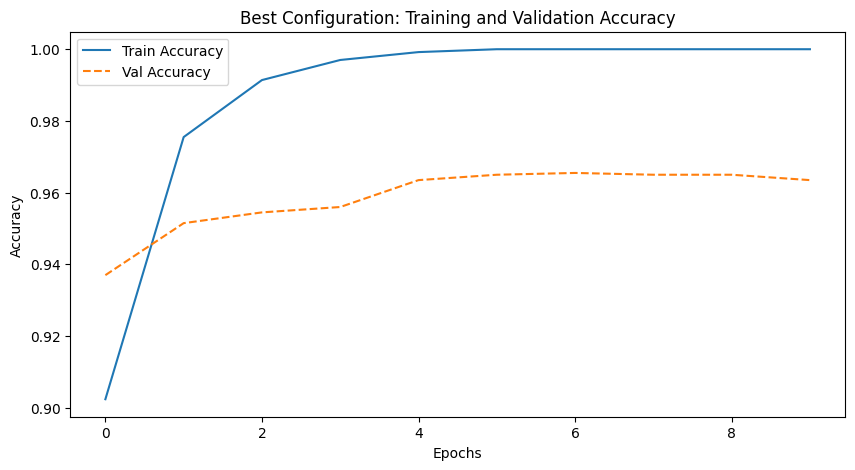

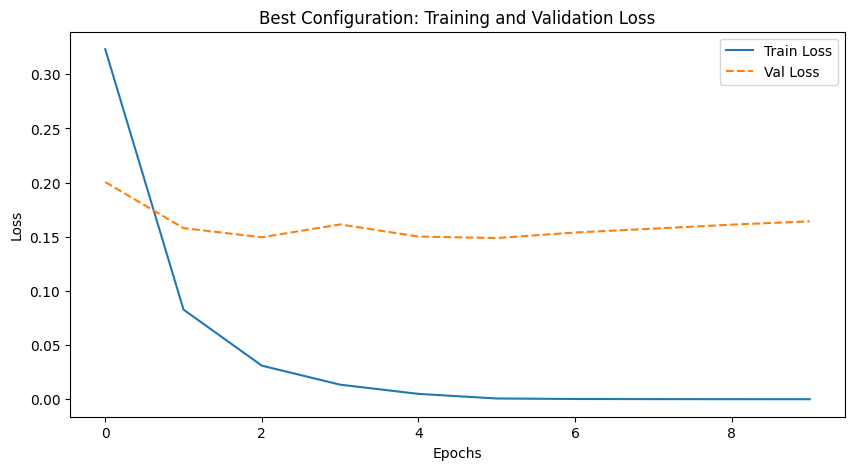

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad
import matplotlib.pyplot as plt
import itertools
import time

# 1. Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data to add a channel dimension (28x28 -> 28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# 2. Define a function to create the CNN model dynamically
def create_model(num_dense_layers=1, num_neurons_per_layer=128):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        Flatten()
    ])
    for _ in range(num_dense_layers):  # Add the specified number of dense layers
        model.add(Dense(num_neurons_per_layer, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # Output layer
    return model

# 3. Define a function to train and evaluate the model with parameters
def train_and_evaluate_with_params(optimizer_name, learning_rate, batch_size, num_dense_layers, num_neurons_per_layer):
    optimizer_dict = {
        'Adam': Adam(learning_rate=learning_rate),
        'RMSprop': RMSprop(learning_rate=learning_rate),
        'SGD': SGD(learning_rate=learning_rate),
        'Adagrad': Adagrad(learning_rate=learning_rate)
    }

    optimizer = optimizer_dict[optimizer_name]
    model = create_model(num_dense_layers=num_dense_layers, num_neurons_per_layer=num_neurons_per_layer)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(
        X_train[:10000], y_train[:10000],
        epochs=10,
        batch_size=batch_size,
        validation_data=(X_test[:2000], y_test[:2000]),
        verbose=1
    )
    end_time = time.time()

    # Evaluate on the test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    return test_loss, test_accuracy, end_time - start_time, history

# 4. Define the hyperparameter grid
param_grid = {
    'optimizer': ['Adam', 'RMSprop', 'SGD', 'Adagrad'],
    'learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'num_dense_layers': [1, 2],
    'num_neurons_per_layer': [64, 128, 256],
}

# Create all combinations of hyperparameters
param_combinations = list(itertools.product(
    param_grid['optimizer'],
    param_grid['learning_rate'],
    param_grid['batch_size'],
    param_grid['num_dense_layers'],
    param_grid['num_neurons_per_layer']
))

# 5. Perform grid search
grid_results = []
total_combinations = len(param_combinations)
counter = 0

for params in param_combinations:
    counter += 1
    optimizer_name, learning_rate, batch_size, num_dense_layers, num_neurons_per_layer = params
    print(f"Testing combination {counter}/{total_combinations}: Optimizer={optimizer_name}, Learning Rate={learning_rate}, "
          f"Batch Size={batch_size}, Dense Layers={num_dense_layers}, Neurons per Layer={num_neurons_per_layer}")
    loss, accuracy, train_time, history = train_and_evaluate_with_params(
        optimizer_name, learning_rate, batch_size, num_dense_layers, num_neurons_per_layer
    )

    grid_results.append({
        'Optimizer': optimizer_name,
        'Learning Rate': learning_rate,
        'Batch Size': batch_size,
        'Dense Layers': num_dense_layers,
        'Neurons per Layer': num_neurons_per_layer,
        'Loss': loss,
        'Accuracy': accuracy,
        'Training Time': train_time,
        'History': history
    })

# 6. Display grid search results
print("\nGrid Search Results:")
print(f"{'Optimizer':<10} | {'Learning Rate':<12} | {'Batch Size':<10} | {'Dense Layers':<12} | "
      f"{'Neurons/L':<10} | {'Accuracy':<10} | {'Loss':<10} | {'Time (s)':<10}")
print("-" * 90)
for result in grid_results:
    print(f"{result['Optimizer']:<10} | {result['Learning Rate']:<12} | {result['Batch Size']:<10} | "
          f"{result['Dense Layers']:<12} | {result['Neurons per Layer']:<10} | {result['Accuracy']:<10.4f} | "
          f"{result['Loss']:<10.4f} | {result['Training Time']:<10.2f}")

# 7. Visualize training accuracy and loss for the best configuration
best_result = max(grid_results, key=lambda x: x['Accuracy'])
print("\nBest Configuration:")
print(best_result)

plt.figure(figsize=(10, 5))
plt.plot(best_result['History'].history['accuracy'], label='Train Accuracy')
plt.plot(best_result['History'].history['val_accuracy'], label='Val Accuracy', linestyle='--')
plt.title('Best Configuration: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(best_result['History'].history['loss'], label='Train Loss')
plt.plot(best_result['History'].history['val_loss'], label='Val Loss', linestyle='--')
plt.title('Best Configuration: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

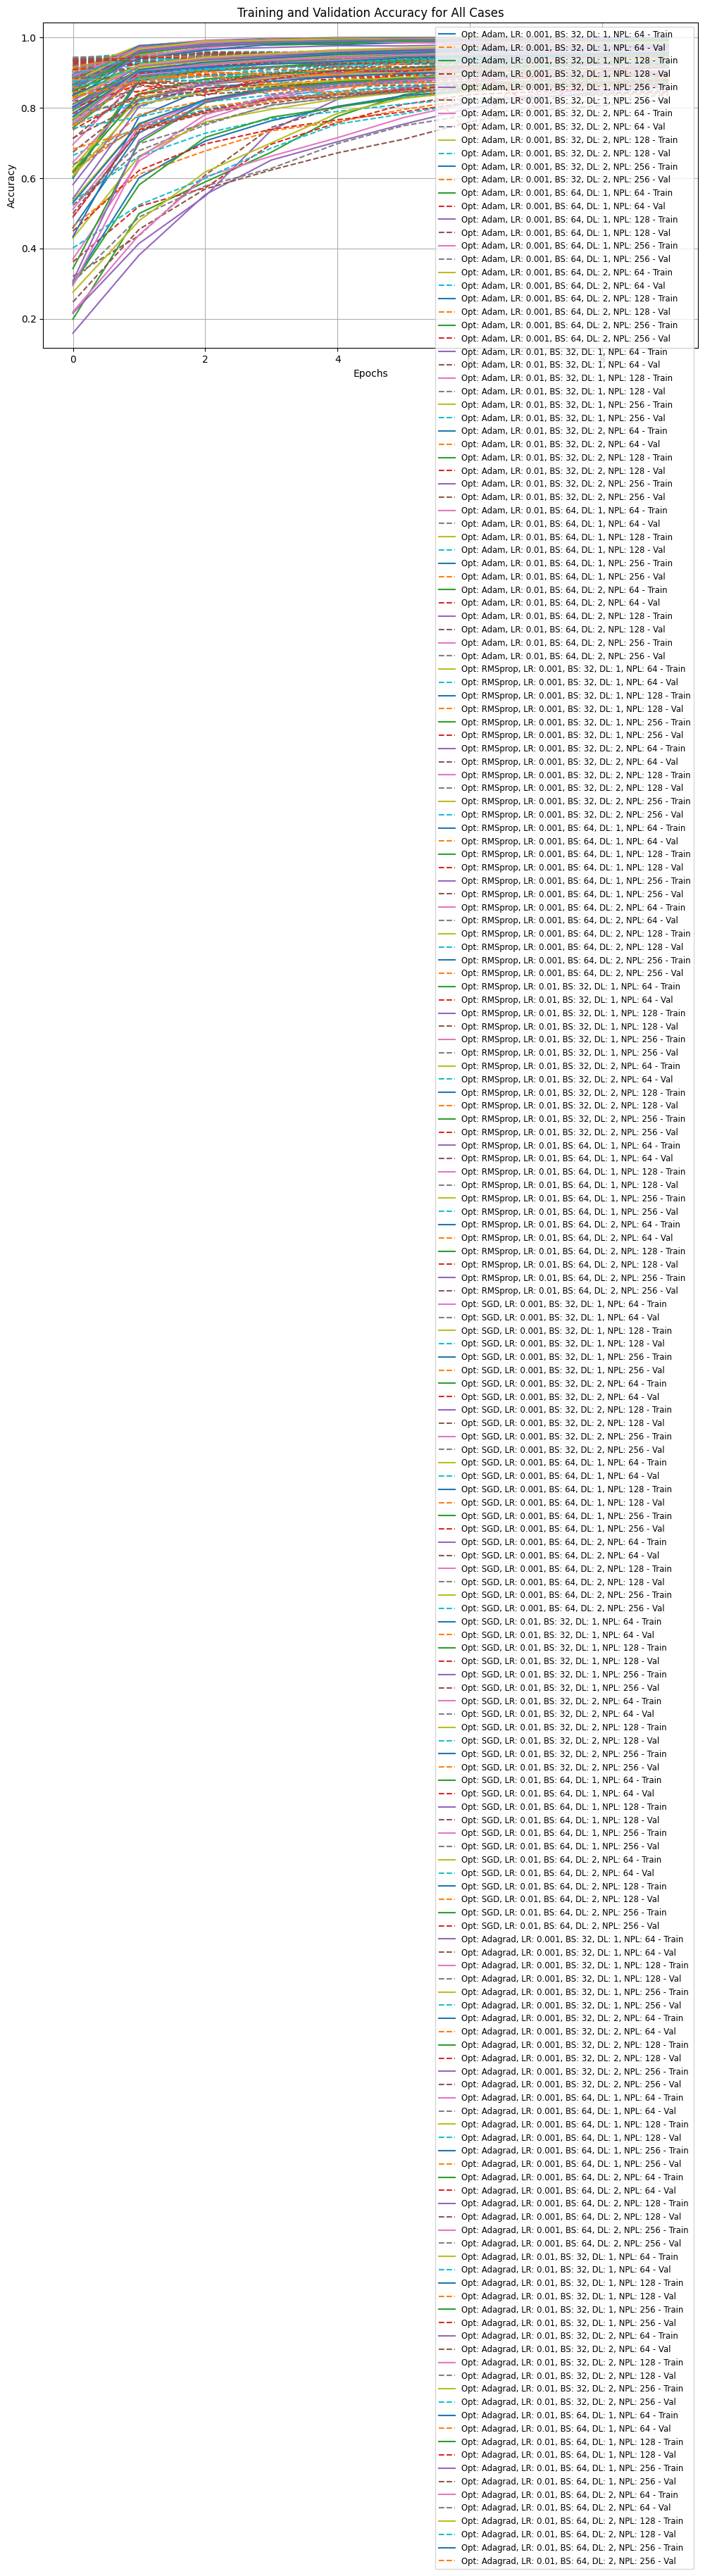

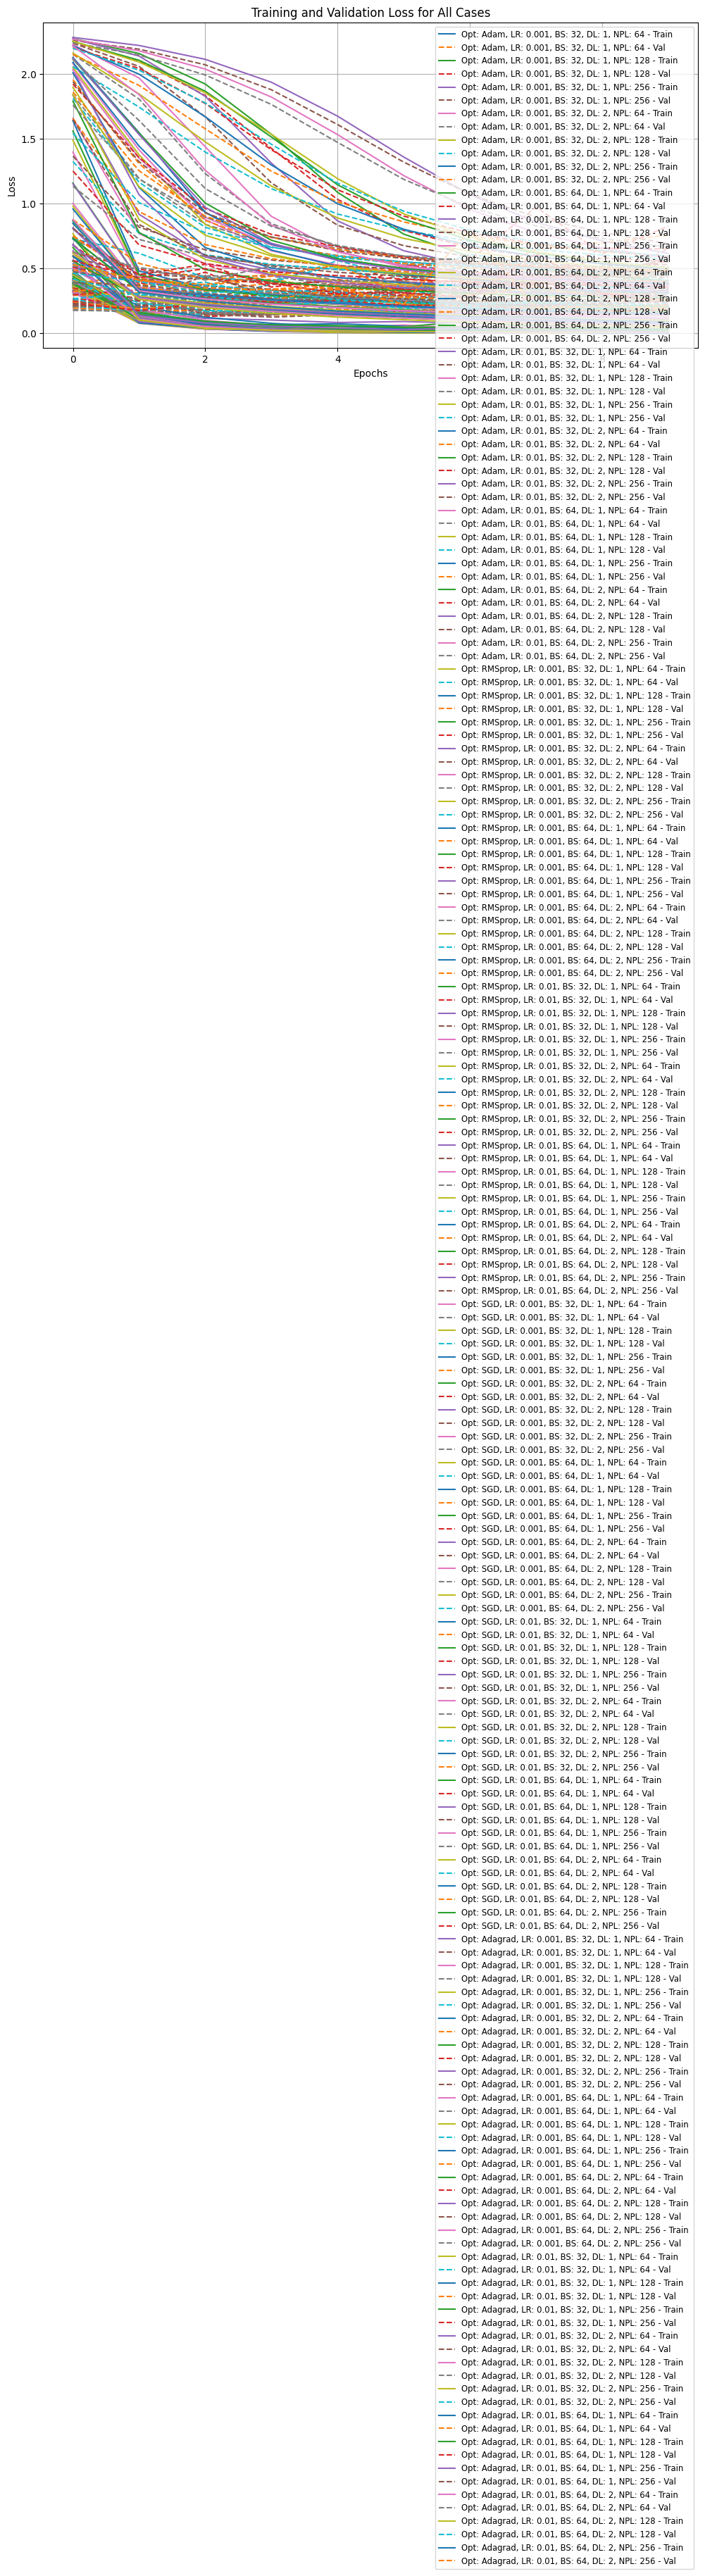

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy for All Cases
plt.figure(figsize=(12, 6))
for result in grid_results:
    optimizer = result['Optimizer']
    learning_rate = result['Learning Rate']
    batch_size = result['Batch Size']
    dense_layers = result['Dense Layers']
    neurons_per_layer = result['Neurons per Layer']

    label = f"Opt: {optimizer}, LR: {learning_rate}, BS: {batch_size}, DL: {dense_layers}, NPL: {neurons_per_layer}"

    history = result['History']
    plt.plot(history.history['accuracy'], label=f'{label} - Train')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{label} - Val')

plt.title('Training and Validation Accuracy for All Cases')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize='small', loc='best')
plt.grid(True)
plt.show()

# Plot Training and Validation Loss for All Cases
plt.figure(figsize=(12, 6))
for result in grid_results:
    optimizer = result['Optimizer']
    learning_rate = result['Learning Rate']
    batch_size = result['Batch Size']
    dense_layers = result['Dense Layers']
    neurons_per_layer = result['Neurons per Layer']

    label = f"Opt: {optimizer}, LR: {learning_rate}, BS: {batch_size}, DL: {dense_layers}, NPL: {neurons_per_layer}"

    history = result['History']
    plt.plot(history.history['loss'], label=f'{label} - Train')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'{label} - Val')

plt.title('Training and Validation Loss for All Cases')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize='small', loc='best')
plt.grid(True)
plt.show()
